# Imports

In [ ]:
from pathlib import Path
import datetime as dt

import pandas as pd
import scipy as sci
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm

In [ ]:
# config
TRANSECT_NAME = 'TKB'

# Load metadata

In [ ]:
# load metadata

p = Path("data/ibutton/2023_season/deployment_log.xlsx")
deployments = pd.read_excel(p, comment="#")
deployments

,sensor_id,transect_name,point_id,elevation,datetime_out,datetime_in,initial_height,final_height,surface,housing,stake,aspect,notes
0,R,TKB,TKB-010,1185,2023-07-07 09:45:00,2023-07-10 15:00:00,50,46.0,snow,NaN,bamboo,SW,Top of C10 ski hill
1,P,TKB,NaN,1173,2023-07-07 09:45:00,NaT,50,NaN,snow,NaN,bamboo,W,maybe lost?
2,B,TKB,NaN,1170,2023-07-07 09:45:00,NaT,50,NaN,snow,NaN,bamboo,W,maybe lost?
3,K,TKB,NaN,1161,2023-07-07 09:45:00,NaT,50,NaN,snow,NaN,bamboo,W,maybe lost?
4,T,TKB,NaN,1146,2023-07-07 09:45:00,2023-07-10 14:30:00,50,0.0,snow,NaN,bamboo,W,NaN
5,G,TKB,TKB-009,1120,2023-07-07 09:45:00,2023-07-10 14:30:00,50,25.0,snow,NaN,bamboo,W,Bottom of c10 ski hill
6,L,TKB,TKB-010,1186,2023-07-08 14:20:00,2023-07-11 15:20:00,50,43.0,snow,NaN,bamboo,SW,NaN
7,O,TKB,TKB-002,1287,2023-07-08 14:55:00,2023-07-13 11:23:00,52,20.0,snow,NaN,bamboo,SW,NaN
8,E,TKB,TKB-002,1287,2023-07-08 14:58:00,2023-07-13 11:23:00,52,12.0,snow,mylar,bamboo,SW,NaN
9,N,TKB,TKB-003,1346,2023-07-08 15:24:00,2023-07-13 11:50:00,55,5.0,snow,NaN,bamboo,SW,Time approx (no photo)


# Load data

In [ ]:
# make list of files

dirname = Path("data/ibutton/2023_Season/")
fnames = list(dirname.glob('**/*.csv'))
fnames = [f for f in fnames if f.suffix == '.csv']
ids = [f.stem.split('_')[1] for f in fnames]
transects = [f.stem.split('_')[0] for f in fnames]
fname_metadata = pd.DataFrame(dict(id=ids, year=2023, transect_name=transects, fname=fnames))
fname_metadata

,id,year,transect_name,fname
0,Q,2023,C9-C18,data/ibutton/2023_Season/C9_to_C18/C9-C18_Q.csv
1,QQ,2023,C9-C18,data/ibutton/2023_Season/C9_to_C18/C9-C18_QQ.csv
2,JJ,2023,C9-C18,data/ibutton/2023_Season/C9_to_C18/C9-C18_JJ.csv
3,II,2023,C9-C18,data/ibutton/2023_Season/C9_to_C18/C9-C18_II.csv
4,FF,2023,C9-C18,data/ibutton/2023_Season/C9_to_C18/C9-C18_FF.csv
...,...,...,...,...
66,FF,2023,Heather,data/ibutton/2023_Season/Heather/Heather_FF.csv
67,H,2023,Heather,data/ibutton/2023_Season/Heather/Heather_H.csv
68,JJ,2023,Heather,data/ibutton/2023_Season/Heather/Heather_JJ.csv
69,Q,2023,Heather,data/ibutton/2023_Season/Heather/Heather_Q.csv


In [ ]:
# load the data from the fname dataframe

files = []
for _, row in fname_metadata.iterrows():
    d = pd.read_csv(row.fname, skiprows=15)
    d.columns = ['datetime', 'unit', 'T']
    d['datetime'] = pd.to_datetime(d['datetime'])
    d['sensor_id'] = row.id
    d['year'] = row.year
    d['transect_name'] = row.transect_name
    d = d.drop(columns=['unit'])
    files.append(d)
df = pd.concat(files, ignore_index=True)
df

,datetime,T,sensor_id,year,transect_name
0,2023-07-14 06:31:00,11.0,Q,2023,C9-C18
1,2023-07-14 06:41:00,11.0,Q,2023,C9-C18
2,2023-07-14 06:51:00,11.0,Q,2023,C9-C18
3,2023-07-14 07:01:00,12.0,Q,2023,C9-C18
4,2023-07-14 07:11:00,12.5,Q,2023,C9-C18
...,...,...,...,...,...
56073,2023-07-20 12:32:00,15.5,QQ,2023,Heather
56074,2023-07-20 12:42:00,16.0,QQ,2023,Heather
56075,2023-07-20 12:52:00,16.0,QQ,2023,Heather
56076,2023-07-20 13:02:00,16.0,QQ,2023,Heather


In [ ]:
# filter deployments
#deployments = deployments[deployments.datetime_out.dt.date == pd.to_datetime(DEPLOY_DATE, format='%y%m%d')]
deployments = deployments.loc[deployments.transect_name == TRANSECT_NAME]
deployments['housing'] = deployments['housing'].fillna('PVC')
deployments

/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_9724/2229967772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deployments['housing'] = deployments['housing'].fillna('PVC')


,sensor_id,transect_name,point_id,elevation,datetime_out,datetime_in,initial_height,final_height,surface,housing,stake,aspect,notes
0,R,TKB,TKB-010,1185,2023-07-07 09:45:00,2023-07-10 15:00:00,50,46.0,snow,PVC,bamboo,SW,Top of C10 ski hill
1,P,TKB,NaN,1173,2023-07-07 09:45:00,NaT,50,NaN,snow,PVC,bamboo,W,maybe lost?
2,B,TKB,NaN,1170,2023-07-07 09:45:00,NaT,50,NaN,snow,PVC,bamboo,W,maybe lost?
3,K,TKB,NaN,1161,2023-07-07 09:45:00,NaT,50,NaN,snow,PVC,bamboo,W,maybe lost?
4,T,TKB,NaN,1146,2023-07-07 09:45:00,2023-07-10 14:30:00,50,0.0,snow,PVC,bamboo,W,NaN
5,G,TKB,TKB-009,1120,2023-07-07 09:45:00,2023-07-10 14:30:00,50,25.0,snow,PVC,bamboo,W,Bottom of c10 ski hill
6,L,TKB,TKB-010,1186,2023-07-08 14:20:00,2023-07-11 15:20:00,50,43.0,snow,PVC,bamboo,SW,NaN
7,O,TKB,TKB-002,1287,2023-07-08 14:55:00,2023-07-13 11:23:00,52,20.0,snow,PVC,bamboo,SW,NaN
8,E,TKB,TKB-002,1287,2023-07-08 14:58:00,2023-07-13 11:23:00,52,12.0,snow,mylar,bamboo,SW,NaN
9,N,TKB,TKB-003,1346,2023-07-08 15:24:00,2023-07-13 11:50:00,55,5.0,snow,PVC,bamboo,SW,Time approx (no photo)


In [ ]:
# filter data with deployments and add metadata
print(f"Initial nobs = {len(df)}")
groups = []
for tup, group in df.groupby(['sensor_id', 'transect_name']):
    id, transect_name = tup
    # match the sensor id, transect name, and squeeze to a series (assuming 1 row is returned)
    deployment = deployments.loc[(deployments.sensor_id == id) & (deployments.transect_name == group['transect_name'].iloc[0])].squeeze()

    if len(deployment) == 0:  # if no deployment records are found
        continue
    # filter sensor data to the datetimes in the deployment record
    group = group.loc[(group['datetime'] > deployment['datetime_out']) & (group["datetime"] < deployment["datetime_in"])]
    # add metadata
    group['elevation'] = deployment['elevation']
    group['surface'] = deployment['surface']
    group['housing'] = deployment['housing']
    group['initial_height'] = deployment['initial_height']
    group['final_height'] = deployment['final_height']
    group['aspect'] = deployment['aspect']

    groups.append(group)
df = pd.concat(groups, ignore_index=True)
print(f"Filtered nobs = {len(df)}")
df

Initial nobs = 56078
Filtered nobs = 7390


/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_9724/1776470611.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['elevation'] = deployment['elevation']
/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_9724/1776470611.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['surface'] = deployment['surface']
/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_9724/1776470611.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,datetime,T,sensor_id,year,transect_name,elevation,surface,housing,initial_height,final_height,aspect
0,2023-07-08 16:45:00,15.5,A,2023,TKB,1468,snow,PVC,50,22.0,SE
1,2023-07-08 16:55:00,14.0,A,2023,TKB,1468,snow,PVC,50,22.0,SE
2,2023-07-08 17:05:00,14.0,A,2023,TKB,1468,snow,PVC,50,22.0,SE
3,2023-07-08 17:15:00,14.0,A,2023,TKB,1468,snow,PVC,50,22.0,SE
4,2023-07-08 17:25:00,13.5,A,2023,TKB,1468,snow,PVC,50,22.0,SE
...,...,...,...,...,...,...,...,...,...,...,...
7385,2023-07-10 13:49:00,5.5,T,2023,TKB,1146,snow,PVC,50,0.0,W
7386,2023-07-10 13:59:00,5.5,T,2023,TKB,1146,snow,PVC,50,0.0,W
7387,2023-07-10 14:09:00,5.5,T,2023,TKB,1146,snow,PVC,50,0.0,W
7388,2023-07-10 14:19:00,5.0,T,2023,TKB,1146,snow,PVC,50,0.0,W


In [ ]:
# interpolate data to clean 10min times
df = df.groupby(['transect_name', 'sensor_id', 'surface', 'housing', 'aspect']).resample('10min', on='datetime').mean(numeric_only=True).reset_index()
df

,transect_name,sensor_id,surface,housing,aspect,datetime,T,year,elevation,initial_height,final_height
0,TKB,A,snow,PVC,SE,2023-07-08 16:40:00,15.5,2023.0,1468.0,50.0,22.0
1,TKB,A,snow,PVC,SE,2023-07-08 16:50:00,14.0,2023.0,1468.0,50.0,22.0
2,TKB,A,snow,PVC,SE,2023-07-08 17:00:00,14.0,2023.0,1468.0,50.0,22.0
3,TKB,A,snow,PVC,SE,2023-07-08 17:10:00,14.0,2023.0,1468.0,50.0,22.0
4,TKB,A,snow,PVC,SE,2023-07-08 17:20:00,13.5,2023.0,1468.0,50.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...
7385,TKB,T,snow,PVC,W,2023-07-10 13:40:00,5.5,2023.0,1146.0,50.0,0.0
7386,TKB,T,snow,PVC,W,2023-07-10 13:50:00,5.5,2023.0,1146.0,50.0,0.0
7387,TKB,T,snow,PVC,W,2023-07-10 14:00:00,5.5,2023.0,1146.0,50.0,0.0
7388,TKB,T,snow,PVC,W,2023-07-10 14:10:00,5.0,2023.0,1146.0,50.0,0.0


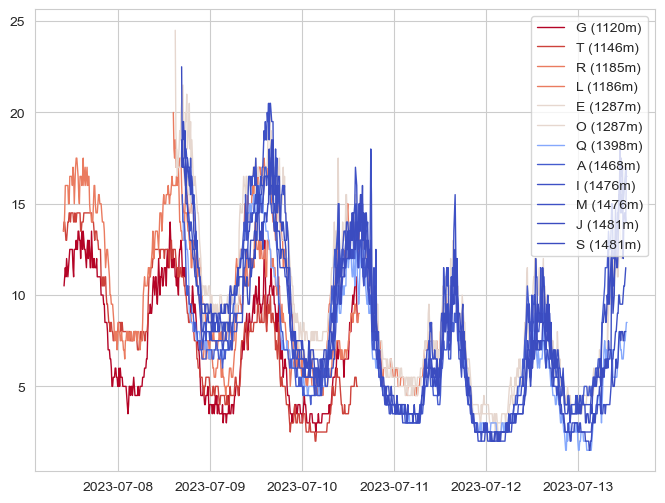

In [ ]:
# quick look at data
fig, ax = plt.subplots(1,1, dpi=100, figsize=(8, 6))
norm = mpl.colors.Normalize(vmin=df['elevation'].min(), vmax=df['elevation'].max())
cmap = plt.cm.coolwarm_r
for tup, group in df.groupby(['elevation', 'sensor_id']):
    elevation, id = tup

    ax.plot(group['datetime'], group['T'], c=cmap(norm(elevation)), label=f"{id} ({elevation:.0f}m)", lw=1)
    ax.legend()

# QC/Paired housing comparison
Mylar is consistently hotter than PVC. However, mylar is quicker to respond to morning/evening changes to solar radiation (more platykurtic). PVC lags changes in insolation and is less responsive to wind because of its higher thermal mass. PVC is consistently slightly cooler at night (higher emissivity?) Example: 7/9 @ 1287m.

Thinking about final sensor height, based on comparisions of data @ 1476m and 1481m, mylar seems to perform better than PVC at heights closer to the snow surface on account of its lower thermal mass. At 1476, final mylar height was 30cm and final PVC height was 3cm. At 1481, final mylar height was 3cm and final PVC height was 0cm. This comparison also implies that sensor melt-out occurs rapidly and data up until the final day may be mostly valid and comparable to other sensors even when final height differs.

Finally, both housings do well reproducing the pattern of scattered clouds on 7/11.

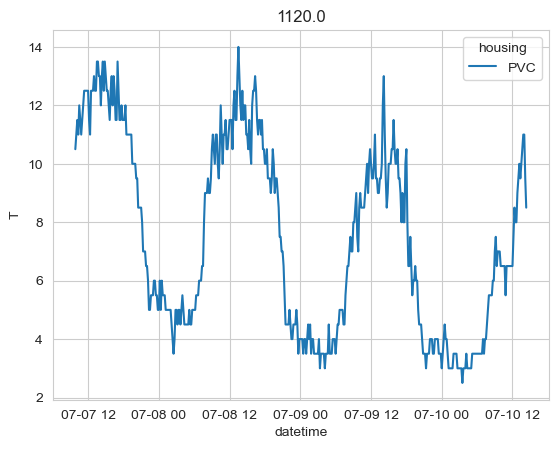

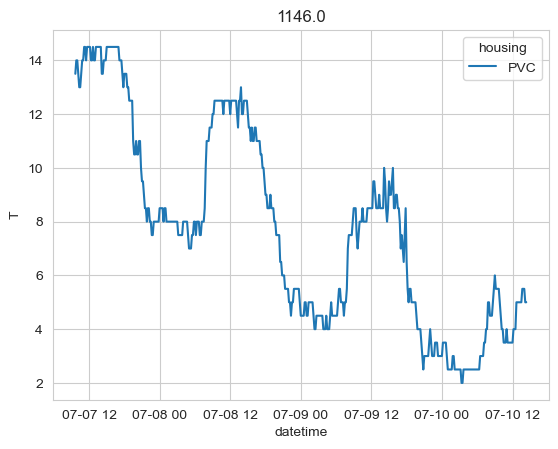

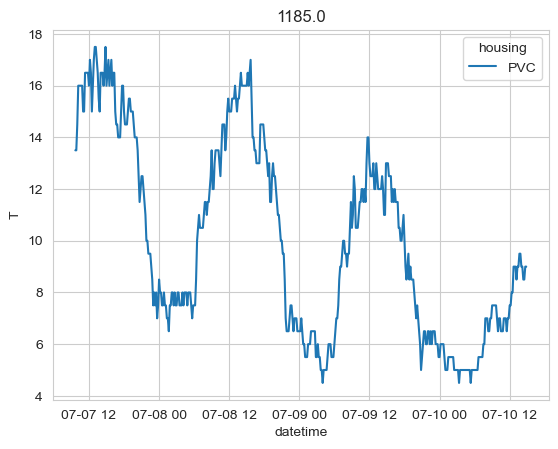

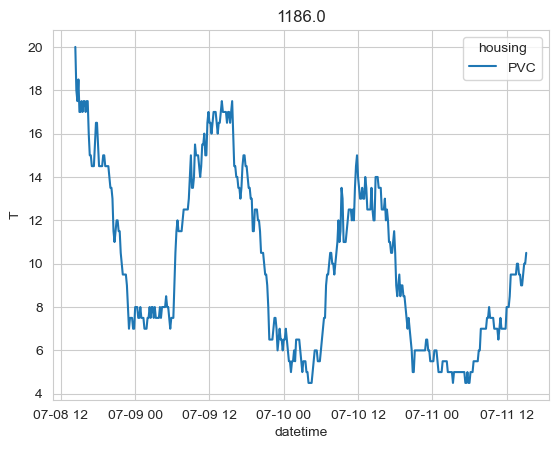

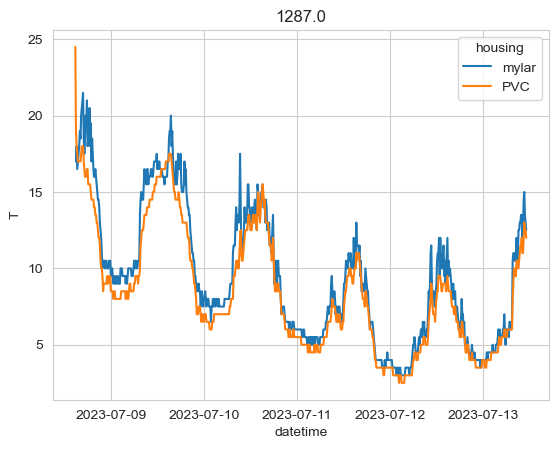

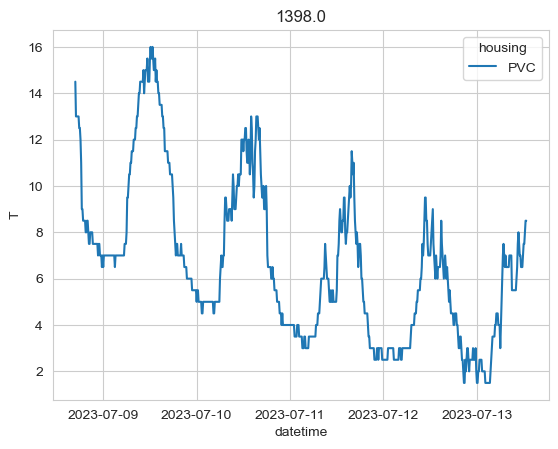

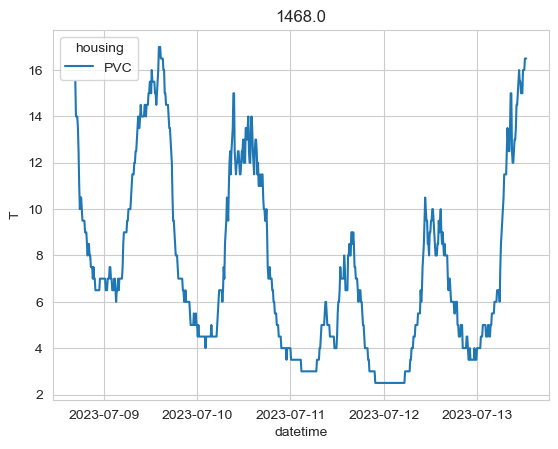

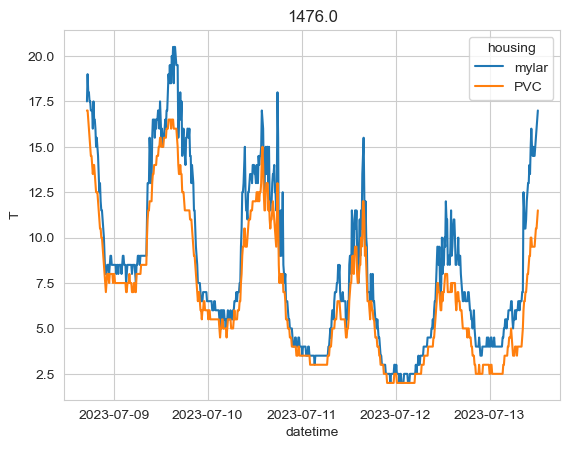

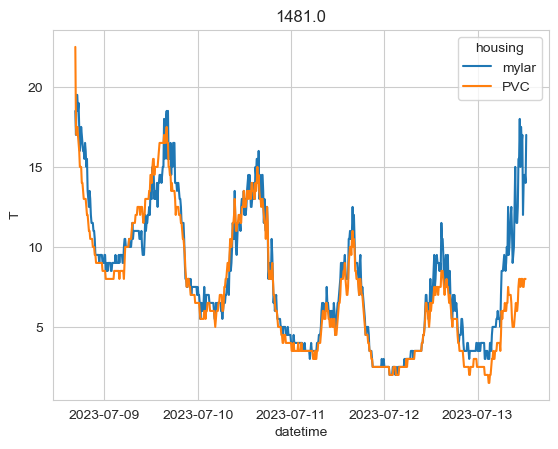

In [ ]:
for k, g in df.groupby('elevation'):
    fig, ax = plt.subplots(1,1)
    sns.lineplot(g, x='datetime', y='T',  hue='housing', ax=ax)
    ax.set_title(f"{k}")

# Calculate the lapse rate

In [ ]:
temp = df.loc[df.elevation.isin([1481, 1476, 1287, 1468, 1398])].groupby(['elevation', 'housing']).resample('1H', on='datetime').mean(numeric_only=True).reset_index(level=0, drop=True).reset_index()

date_mask = (df.datetime >= dt.datetime(2023, 7, 9)) & (df.datetime <= dt.datetime(2023, 7, 12, 4))  # mask to times when the sensors overlap (& are valid?)
temp = df.loc[date_mask, :]
temp.groupby(['elevation', 'housing', 'aspect']).mean(numeric_only=True).reset_index()
pvc = df.loc[(df.housing == 'PVC') & (df.aspect.isin(['SW', 'W'])) & date_mask & (df.elevation > 1185)]
mylar = df.loc[(df.housing == 'mylar') & (df.aspect.isin(['SW', 'W'])) & date_mask & (df.elevation > 1185)]

              datetime       pvc     mylar
0  2023-07-09 00:00:00 -0.309505 -4.298284
1  2023-07-09 01:00:00  0.997220 -2.784516
2  2023-07-09 02:00:00  0.043187 -3.428407
3  2023-07-09 03:00:00  0.228366 -3.829277
4  2023-07-09 04:00:00 -0.352691 -4.038229
..                 ...       ...       ...
72 2023-07-12 00:00:00 -5.620134 -6.750066
73 2023-07-12 01:00:00 -4.767291 -6.089141
74 2023-07-12 02:00:00 -3.880379 -5.010311
75 2023-07-12 03:00:00 -2.818584 -3.688461
76 2023-07-12 04:00:00 -3.863345 -5.219264

[77 rows x 3 columns]


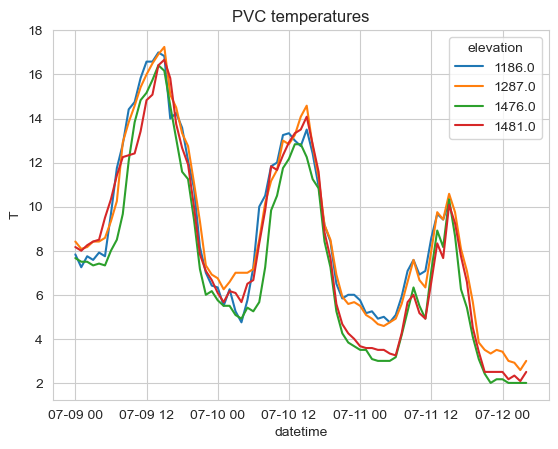

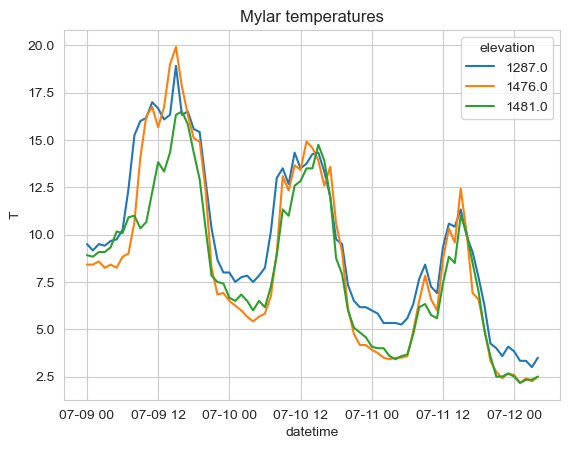

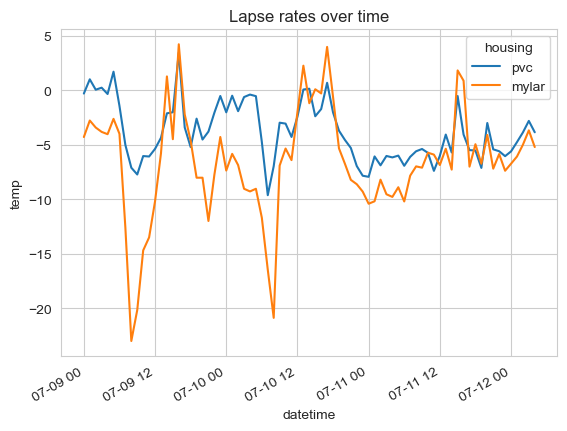

In [ ]:
# lapse rate over time by resmapling to 1H

pvc_1h = pvc.groupby('elevation').resample('1H', on='datetime').mean(numeric_only=True)
mylar_1h = mylar.groupby('elevation').resample('1H', on='datetime').mean(numeric_only=True)

fig, ax = plt.subplots(1,1)
sns.lineplot(pvc_1h, x='datetime', y='T', hue='elevation', palette='tab10', ax=ax)
ax.set_title('PVC temperatures')

fig, ax = plt.subplots(1,1)
sns.lineplot(mylar_1h, x='datetime', y='T', palette='tab10', hue='elevation')
ax.set_title('Mylar temperatures')

pvc_lapse = pvc_1h.groupby('datetime').apply(lambda x: sci.stats.linregress(x['elevation'], x['T']).slope)
mylar_lapse = mylar_1h.groupby('datetime').apply(lambda x: sci.stats.linregress(x['elevation'], x['T']).slope)
lapse = pd.DataFrame(dict(pvc=pvc_lapse, mylar=mylar_lapse)) * 1000  # convert to degC/km
lapse = lapse.reset_index()
print(lapse)
lapse = pd.melt(lapse, var_name='housing', value_name='temp', id_vars='datetime')

fig, ax = plt.subplots(1,1)
sns.lineplot(lapse, x='datetime', y='temp', hue='housing', ax=ax)
ax.set_title('Lapse rates over time')
fig.autofmt_xdate()



 ^ Spikes are from the sun hitting sensors at different times as the sun rises

# Night-time lapse rate

              datetime       pvc      mylar
0  2023-07-09 00:00:00 -0.309505  -4.298284
1  2023-07-09 01:00:00  0.997220  -2.784516
2  2023-07-09 02:00:00  0.043187  -3.428407
3  2023-07-09 03:00:00  0.228366  -3.829277
4  2023-07-09 04:00:00 -0.352691  -4.038229
5  2023-07-09 05:00:00  1.696060  -2.631208
6  2023-07-09 22:00:00 -2.068382  -7.760759
7  2023-07-09 23:00:00 -0.533945  -4.298284
8  2023-07-10 00:00:00 -2.031738  -7.376923
9  2023-07-10 01:00:00 -0.507117  -5.846120
10 2023-07-10 02:00:00 -1.926389  -6.873847
11 2023-07-10 03:00:00 -0.631442  -9.048541
12 2023-07-10 04:00:00 -0.403076  -9.291561
13 2023-07-10 05:00:00 -0.549649  -9.048541
14 2023-07-10 22:00:00 -6.964838  -8.630636
15 2023-07-10 23:00:00 -7.852129  -9.308595
16 2023-07-11 00:00:00 -7.950935 -10.421493
17 2023-07-11 01:00:00 -6.080165 -10.195507
18 2023-07-11 02:00:00 -6.895478  -8.212732
19 2023-07-11 03:00:00 -6.037633  -9.551616
20 2023-07-11 04:00:00 -6.169810  -9.794636
21 2023-07-11 05:00:00 -6.004261

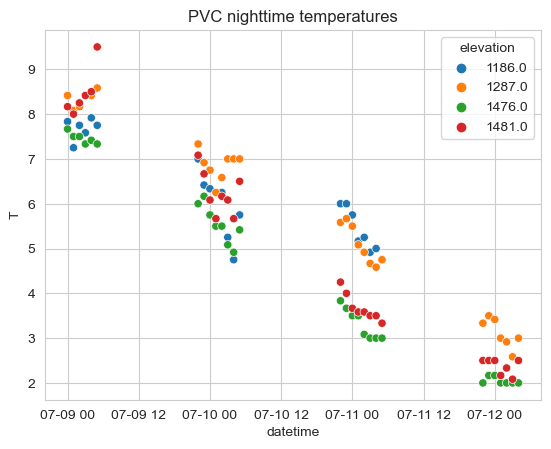

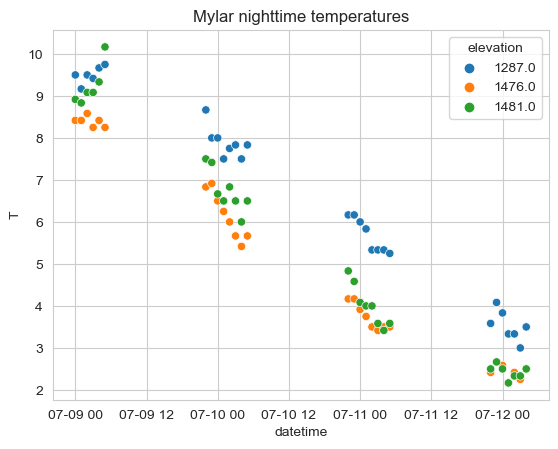

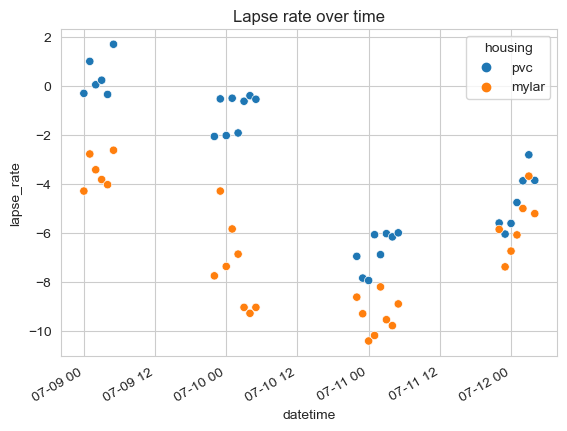

In [ ]:
# filter to c10 side of the ridge, times after 2200 and before 0500 on the dates where we're assuming valid data
pvc_night = df.loc[(df.housing == 'PVC') & date_mask & (df.aspect.isin(['SW', 'W'])) & ((df.datetime.dt.hour >= 22) | (df.datetime.dt.hour <= 5)) & (df.elevation > 1185)]
mylar_night = df.loc[(df.housing == 'mylar') & date_mask & (df.aspect.isin(['SW', 'W'])) & ((df.datetime.dt.hour >= 22) | (df.datetime.dt.hour <= 5)) & (df.elevation > 1185)]

pvc_1h = pvc_night.groupby('elevation').resample('1H', on='datetime').mean(numeric_only=True).dropna(subset='T')
mylar_1h = mylar_night.groupby('elevation').resample('1H', on='datetime').mean(numeric_only=True).dropna(subset='T')

fig, ax = plt.subplots(1,1)
sns.scatterplot(pvc_1h, x='datetime', y='T', palette='tab10', hue='elevation')
ax.set_title('PVC nighttime temperatures')

fig, ax = plt.subplots(1,1)
sns.scatterplot(mylar_1h, x='datetime', y='T', palette='tab10', hue='elevation')
ax.set_title('Mylar nighttime temperatures')

# calculate lapse rate
pvc_lapse = pvc_1h.groupby('datetime').apply(lambda x: sci.stats.linregress(x['elevation'], x['T']).slope)
mylar_lapse = mylar_1h.groupby('datetime').apply(lambda x: sci.stats.linregress(x['elevation'], x['T']).slope)

lapse = pd.DataFrame(dict(pvc=pvc_lapse, mylar=mylar_lapse)) * 1000  # convert to degC/km
lapse = lapse.reset_index()
print(lapse)
lapse = pd.melt(lapse, var_name='housing', value_name='lapse_rate', id_vars='datetime')  # convert to tidy data

fig, ax = plt.subplots(1,1)
sns.scatterplot(lapse, x='datetime', y='lapse_rate', hue='housing', ax=ax)
ax.set_title('Lapse rate over time')
fig.autofmt_xdate()

In [ ]:
# whole-period lapse rate
pvc_lapse = sci.stats.linregress(pvc['elevation']/1000, pvc['T'])
print("PVC whole-period lapse:", pvc_lapse)

mylar_lapse = sci.stats.linregress(mylar['elevation']/1000, mylar['T'])
print("Mylar whole-period lapse:", mylar_lapse)

PVC whole-period lapse: LinregressResult(slope=-5.596572556705621, intercept=16.01990894698292, rvalue=-0.17493454224485797, pvalue=1.6832319449111413e-13, stderr=0.7531867988423918, intercept_stderr=1.0323352675345552)
Mylar whole-period lapse: LinregressResult(slope=-6.641305737006265, intercept=18.275977831779393, rvalue=-0.13926121195024357, pvalue=2.2551953793637614e-07, stderr=1.276347470766048, intercept_stderr=1.8092806535816035)


In [ ]:
# calculate overall nighttime lapse rate
print("\n PVC night-time lapse:", sci.stats.linregress(pvc_night['elevation']/1000, pvc_night['T']))
print("\n Mylar night-time lapse:", sci.stats.linregress(mylar_night['elevation']/1000, mylar_night['T']))


 PVC night-time lapse: LinregressResult(slope=-4.748873920623395, intercept=11.884208208691195, rvalue=-0.2903762250631089, pvalue=7.002830483387296e-14, stderr=0.6200577261922442, intercept_stderr=0.8512887086266938)

 Mylar night-time lapse: LinregressResult(slope=-6.789671104227497, intercept=15.38026931777458, rvalue=-0.25586746309671415, pvalue=5.076978224462971e-09, stderr=1.1415239735607443, intercept_stderr=1.618162207602811)
